In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
match = pd.read_csv('match.csv')
match = match.dropna()
match_with_agg = pd.read_csv('match_with_agg.csv')
players = pd.read_csv('player.csv')
teams = pd.read_csv('team.csv', encoding='latin-1')

In [18]:
match.head()

,country_id,league_id,season,stage,date,match_id,home_team_id,away_team_id,home_team_goal,away_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
997,1,1,2012/2013,1,7/28/12 0:00,1223977,9993,9994,2,4,...,2.88,2.40,3.4,2.9,2.45,3.3,2.7,2.40,3.25,2.7
998,1,1,2012/2013,1,7/28/12 0:00,1223980,9998,1773,5,2,...,4.50,1.80,3.6,4.5,1.75,3.7,4.2,1.80,3.50,4.0
999,1,1,2012/2013,1,7/29/12 0:00,1223981,9985,10000,0,1,...,5.50,1.70,3.7,5.0,1.67,3.6,5.0,1.70,3.50,4.5
1000,1,1,2012/2013,1,7/28/12 0:00,1223982,8203,9986,4,2,...,6.00,1.57,3.9,6.0,1.53,3.9,6.0,1.50,3.80,6.0
1001,1,1,2012/2013,1,7/28/12 0:00,1223983,8342,8475,3,1,...,11.00,1.25,5.5,12.0,1.25,5.5,10.0,1.25,5.50,9.0


In [19]:
match.columns

Index(['country_id', 'league_id', 'season', 'stage', 'date', 'match_id',
       'home_team_id', 'away_team_id', 'home_team_goal', 'away_team_goal',
       'home_player_1', 'home_player_2', 'home_player_3', 'home_player_4',
       'home_player_5', 'home_player_6', 'home_player_7', 'home_player_8',
       'home_player_9', 'home_player_10', 'home_player_11', 'away_player_1',
       'away_player_2', 'away_player_3', 'away_player_4', 'away_player_5',
       'away_player_6', 'away_player_7', 'away_player_8', 'away_player_9',
       'away_player_10', 'away_player_11', 'B365H', 'B365D', 'B365A', 'BWH',
       'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD',
       'PSA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA',
       'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA'],
      dtype='object')

In [11]:
players.head()

,player_id,player_name,birthday,height,weight
0,505942,Aaron Appindangoye,2/29/92 0:00,182.88,187
1,155782,Aaron Cresswell,12/15/89 0:00,170.18,146
2,162549,Aaron Doran,5/13/91 0:00,170.18,163
3,30572,Aaron Galindo,5/8/82 0:00,182.88,198
4,23780,Aaron Hughes,11/8/79 0:00,182.88,154


In [12]:
teams.head()

,team_id,team_long_name,team_short_name
0,9987,KRC Genk,GEN
1,9993,Beerschot AC,BAC
2,10000,SV Zulte-Waregem,ZUL
3,9994,Sporting Lokeren,LOK
4,9984,KSV Cercle Brugge,CEB


In [13]:
match_with_agg.head()

,Unnamed: 0,country_id,league_id,season,stage,date,match_id,home_team_id,away_team_id,home_team_goal,...,VCA,GBH,GBD,GBA,BSH,BSD,BSA,home_bet_agg,draw_bet_agg,away_bet_agg
0,0,1,1,2008/2009,1,8/17/08 0:00,492473,9987,9993,1,...,4.50,1.78,3.25,4.00,1.73,3.40,4.20,1.765556,3.322222,4.164444
1,1,1,1,2008/2009,1,8/16/08 0:00,492474,10000,9994,0,...,3.25,1.85,3.25,3.75,1.91,3.25,3.60,1.898889,3.250000,3.616667
2,2,1,1,2008/2009,1,8/16/08 0:00,492475,9984,8635,0,...,2.65,2.50,3.20,2.50,2.30,3.20,2.75,2.462222,3.233333,2.544444
3,3,1,1,2008/2009,1,8/17/08 0:00,492476,9991,9998,5,...,6.50,1.50,3.75,5.50,1.44,3.75,6.50,1.438889,3.805556,6.533333
4,4,1,1,2008/2009,1,8/16/08 0:00,492477,7947,9985,1,...,1.65,4.50,3.50,1.65,4.75,3.30,1.67,4.494444,3.422222,1.674444


Figuring out what is considered an upset game.

In [26]:
#odds of home team winning
print(match['B365H'].min())
print(match['B365H'].max())

1.05
15.0


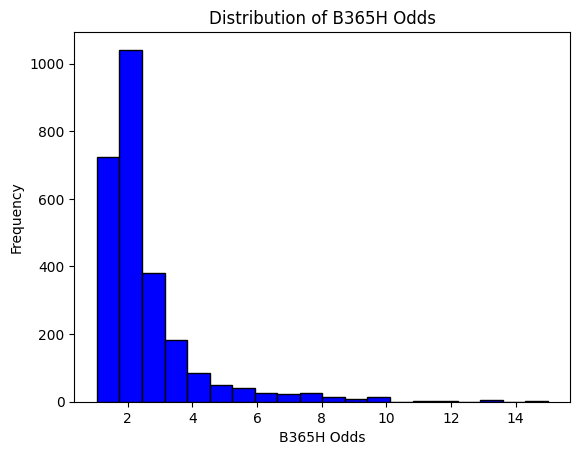

In [34]:
plt.hist(match["B365H"], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of B365H Odds')
plt.xlabel('B365H Odds')
plt.ylabel('Frequency')
plt.show()

1.17
34.0


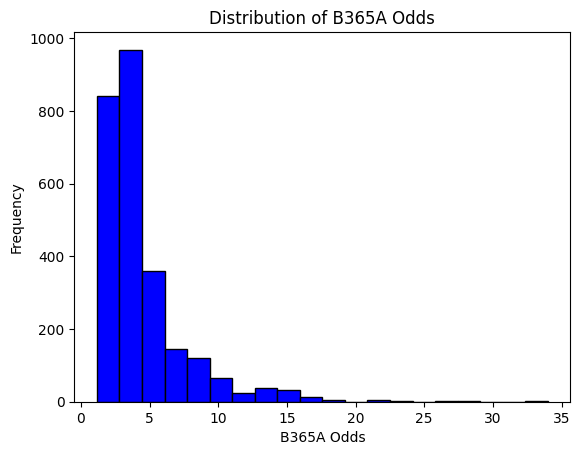

In [35]:
#odds of away team winning
print(match['B365A'].min())
print(match['B365A'].max()) 
plt.hist(match["B365A"], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of B365A Odds')
plt.xlabel('B365A Odds')
plt.ylabel('Frequency')
plt.show()

In [38]:
match['result'] = 'D'  # Default to draw

match.loc[match['home_team_goal'] > match['away_team_goal'], 'result'] = 'H'  # Home team upset 
match.loc[match['home_team_goal'] < match['away_team_goal'], 'result'] = 'A'  # Away team upset

upset_condition = (match['result'] == 'H') & (5 * match['B365H'] < match['B365A']) | \
                  (match['result'] == 'A') & (6 * match['B365A'] < match['B365H'])
upset_data = match[upset_condition]
upset_data.to_csv('upset_games.csv', index=False)

In [40]:
upset_games = pd.read_csv('upset_games.csv')
upset_games.head()

,country_id,league_id,season,stage,date,match_id,home_team_id,away_team_id,home_team_goal,away_team_goal,...,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,result
0,1,1,2012/2013,1,7/28/12 0:00,1223983,8342,8475,3,1,...,1.25,5.50,12.0,1.25,5.5,10.00,1.25,5.50,9.0,H
1,1,1,2012/2013,11,10/19/12 0:00,1224063,8635,8475,2,0,...,1.22,6.50,13.0,1.22,5.5,10.00,1.25,5.50,9.0,H
2,1,1,2012/2013,16,11/18/12 0:00,1224103,8635,8571,1,0,...,1.30,5.50,11.0,1.30,4.5,9.25,1.29,4.75,9.0,H
3,1,1,2012/2013,17,11/25/12 0:00,1224111,8342,9986,1,0,...,1.36,5.25,8.5,1.33,4.5,8.00,1.33,4.50,8.5,H
4,1,1,2012/2013,17,11/23/12 0:00,1224112,9985,9989,3,0,...,1.40,4.80,8.5,1.40,4.1,7.00,1.36,4.50,7.5,H
